In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!python -m spacy download en_core_web_md --quiet

     |████████████████████████████████| 96.4 MB 7.5 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


**RESTART KERNEL AFTER THE FOLLOWING CELL. THIS IS TO ENSURE SPACY IS INSTALLED**

In [3]:
import spacy
# nlp = spacy.load("en_core_web_lg") # for large model
nlp = spacy.load('en_core_web_md') # use medium model
######### RESTART RUNTIME AFTER FIRST RUN

### **Test if it works correctly using the simiarity attribute**

In [4]:
doc1 = nlp(u'the person wear red T-shirt. He likes to walk and is always playful in nature ')
doc2 = nlp(u'this person is walking. That same person is one of the most joyful people I have met')
doc1.similarity(doc2)

0.8977779112576395

*Similarity Score is 0.89777, quite good!* 

### **Using the vector attribute to actually see the vectors**

In [5]:
np.size(doc1.vector), doc1.vector[:10]

(300, array([ 0.03568406,  0.14651284, -0.14489225, -0.06196288,  0.09980166,
         0.08404781,  0.01476733, -0.11692534, -0.07191351,  2.1163518 ],
       dtype=float32))

We have a 300-dimensional vector. <br>
The first 10 components are shown for reference. Note that they do not necessarily lie between 0 and 1

### **Lets visualise the vector**
Note that we defined `doc1` as `the person wear red T-shirt. He likes to walk and is always playful in nature`

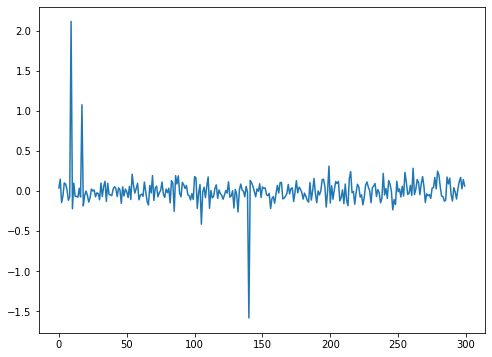

In [6]:
plt.figure(figsize=(8,6))
plt.plot(doc1.vector)

_Plotting clearly shows how **some elements in the vector have a greater magnitude**. This should most likely correspond to the terms **red, walk, playful**_

### **One more check!**

In [7]:
df = pd.DataFrame({'Text': [], 'Has Vector':[], 'Vector Norm': [], 'Is out of Vecab':[]})
for token in doc1:
    df2 = {'Text': token.text, 'Has Vector': token.has_vector, 
           'Vector Norm': token.vector_norm, 'Is out of Vecab' : token.is_oov}
    df = df.append(df2, ignore_index = True)
df

,Text,Has Vector,Vector Norm,Is out of Vecab
0,the,1.0,4.709350,0.0
1,person,True,6.158658,False
2,wear,True,7.019624,False
3,red,True,6.283091,False
4,T,True,6.070901,False
5,-,True,5.603344,False
6,shirt,True,6.752304,False
7,.,True,4.931635,False
8,He,True,6.080851,False
9,likes,True,6.536640,False


The table above shows the magnitude of vector (`Vector Norm` column) representation for each word (`Text` column). `Has Vector` column represents if the word is familiar to spacy or not. As it turns out, spacy knows a lot of words!

In [8]:
word_try = nlp(u'wear')
np.linalg.norm(word_try.vector)

7.0196238

Now compare this value to the `Vector Norm` of the `Text` 'wear'. Awesome!

# **Run on the dataset**
Add the `many_answers.csv` file to the session storage. This is the dataset we are going to use <br>

**NOTE: For testing this work on your dataset, the dataframe should have -**
- **Two columns with text values, It is assumed that you need to calculate similarity scores for values in the same row**
- **The columns must be named `ans1` and `ans2`**


In [10]:
data = pd.read_csv('Group_75_Dataset1.csv')
data.head()

,type,ans1,ans2,ans3,ans4,ans5
0,ER model,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,The ER model defines the conceptual view of a ...,An Entity Relationship (ER) Diagram is a type ...,ER-modeling is a data modeling technique used ...
1,normalization,Database normalization is used in a database m...,Normalization is the process of organizing the...,Database Normalization is a technique of organ...,Normalization is a database design technique w...,Normalization is the process of efficiently or...
2,advantage dbms,"It has decreased the risk of data management, ...",1. Improved data sharing:\nThe DBMS helps crea...,1. Data Redundancy\nUnlike traditional file-sy...,1. Improved data sharing\n \nAn advantage of t...,1.Minimize Data Redundancy \nIn File Processin...
3,RDBMS,RDBMS stands for Relational Database Managemen...,A relational database management system (RDBMS...,RDBMS stands for relational database managemen...,RDBMS full form is for Relational Database Man...,A relational database is a type of database. I...
4,Dbms Architecture,The design of a DBMS depends on its architectu...,The DBMS design depends upon its architecture....,The architecture of DBMS depends on the comput...,"DBMS architecture helps in design, development...",A Database Management system is not always dir...


assuming that `ans1` is the model answer, we calculate similarity with other columns' answers

In [11]:
data = data[['ans1', 'ans2']]
data.head(2)

,ans1,ans2
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...
1,Database normalization is used in a database m...,Normalization is the process of organizing the...


### **Checking and Dropping Missing Rows**

In [12]:
# Checking the missing values
data.isnull().sum()

ans1    0
ans2    1
dtype: int64

In [13]:
# Checking how the row looks when there is missing data
data[data['ans2'].isna()]

,ans1,ans2
22,It is the type of database that stores data in...,NaN


In [14]:
data = data.dropna()
data.isnull().sum()

ans1    0
ans2    0
dtype: int64

## **Preprocessing the text**

### **Puncuation removal**

In [15]:
import string #library that contains punctuation

# define custom function to remove punctuations
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation]).lower()
    # punctuationfree = punctuationfree.apply(lambda x: x.lower())
    return punctuationfree

#storing the puntuation free text
data['clean_ans1']= data['ans1'].apply(lambda x:remove_punctuation(x))
data['clean_ans2']= data['ans2'].apply(lambda x:remove_punctuation(x))

In [16]:
data[['clean_ans1', 'clean_ans2']].head(2)

,clean_ans1,clean_ans2
0,er model stands for an entityrelationship mode...,an entity–relationship model er model describe...
1,database normalization is used in a database m...,normalization is the process of organizing the...


### **Stopwords Removal**
We use the `nltk` or Natural Language Tool Kit library

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
# Checking some of the stopwords by nltk
stopwords[:100:5]

['i',
 'our',
 "you've",
 'yourself',
 'himself',
 'herself',
 'they',
 'what',
 'that',
 'is',
 'been',
 'having',
 'a',
 'if',
 'while',
 'with',
 'through',
 'below',
 'in',
 'under']

In [19]:
# Uncomment and run this cell to see how stopwords have been removed

# txt = data['clean_ans1'][0]
# print(txt[:100])
# print([i for i in txt[:100].split(' ') if i not in stopwords])

In [20]:
# Defining the custom function to remove stopwords
def remove_stopwords(text):
    output= [i for i in text.split(' ') if i not in stopwords]
    return output

#applying the function
data['clean_ans1'] = data['clean_ans1'].apply(remove_stopwords)
data['clean_ans2'] = data['clean_ans2'].apply(remove_stopwords)

In [21]:
data.head(2)

,ans1,ans2,clean_ans1,clean_ans2
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,"[er, model, stands, entityrelationship, model,...","[entity–relationship, model, er, model, descri..."
1,Database normalization is used in a database m...,Normalization is the process of organizing the...,"[database, normalization, used, database, mana...","[normalization, process, organizing, data, dat..."


### **Tokenise and Lemmatize**

In [22]:
# Downloading the necessary libraries
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Since the `clean_ans` columns have lists of individual words, we first concatenate them into a string (sentence)

In [23]:
data['clean_ans1'] = data['clean_ans1'].apply(lambda x: " ".join(x))
data['clean_ans2'] = data['clean_ans2'].apply(lambda x: " ".join(x))
data.head(2)

,ans1,ans2,clean_ans1,clean_ans2
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,er model stands entityrelationship model highl...,entity–relationship model er model describes s...
1,Database normalization is used in a database m...,Normalization is the process of organizing the...,database normalization used database managemen...,normalization process organizing data database...


In [24]:
# define custom function to lemmatize and tokenise text
def lemmatize_and_tokenise_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data['clean_ans1'] = data.clean_ans1.apply(lemmatize_and_tokenise_text)
data['clean_ans2'] = data.clean_ans2.apply(lemmatize_and_tokenise_text)
data.head(2)

,ans1,ans2,clean_ans1,clean_ans2
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,"[er, model, stand, entityrelationship, model, ...","[entity–relationship, model, er, model, descri..."
1,Database normalization is used in a database m...,Normalization is the process of organizing the...,"[database, normalization, used, database, mana...","[normalization, process, organizing, data, dat..."


Once again, the `clean_ans` columns have been converted into lists of individual words, sp we concatenate them into a string (sentence)

In [25]:
data['clean_ans1'] = data['clean_ans1'].apply(lambda x: " ".join(x))
data['clean_ans2'] = data['clean_ans2'].apply(lambda x: " ".join(x))
data.head(2)

,ans1,ans2,clean_ans1,clean_ans2
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,er model stand entityrelationship model highle...,entity–relationship model er model describes s...
1,Database normalization is used in a database m...,Normalization is the process of organizing the...,database normalization used database managemen...,normalization process organizing data database...


## **Calculate the similarity score using spacy**

In [26]:
# Initialise a list to save our scores
our_score_col1_2 = []

# Loop through the rows and add the scores to the list
for ans, ref_ans in zip(data['clean_ans2'], data['clean_ans1']):
    # print(ans, ref_ans)
    doc1 = nlp(ans) 
    doc2 = nlp(ref_ans)
    our_score_col1_2.append(doc1.similarity(doc2))

In [27]:
# Add the scores to our table
data['spacy_scores'] = our_score_col1_2
data.head(2)

,ans1,ans2,clean_ans1,clean_ans2,spacy_scores
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,er model stand entityrelationship model highle...,entity–relationship model er model describes s...,0.934898
1,Database normalization is used in a database m...,Normalization is the process of organizing the...,database normalization used database managemen...,normalization process organizing data database...,0.949157


**Wohooo! We have our similarity scores using Spacy!**

## **Calculate the similarity score using Sentence Transformers**

In [28]:
# Install and import the libraries
!pip install -U sentence-transformers --quiet
from sentence_transformers import SentenceTransformer

# Note that we are using 'distilbert' which is a part of the 'BERT" library
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
from sentence_transformers import util

     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 4.2 MB 12.0 MB/s 
     |████████████████████████████████| 1.2 MB 38.6 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 6.6 MB 40.0 MB/s 
     |████████████████████████████████| 596 kB 45.0 MB/s 


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [29]:
# Initialise a list to save our scores
transformer_scores = []

# Loop through the rows and add the scores to the list
for i,j in zip(data['clean_ans1'], data['clean_ans2']):
    lst = []
    lst.append(i)
    lst.append(j)

    # encode the contents of the list
    sentence_embeddings = model.encode(lst)

    # calculate the similarity scores. Observe how cosine similarity is used
    scores = float(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[1]))

    # append our scores to the list
    transformer_scores.append(scores)

In [30]:
# Add the scores to our table
data['transformers_scores'] = transformer_scores
data.head(2)

,ans1,ans2,clean_ans1,clean_ans2,spacy_scores,transformers_scores
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,er model stand entityrelationship model highle...,entity–relationship model er model describes s...,0.934898,0.896880
1,Database normalization is used in a database m...,Normalization is the process of organizing the...,database normalization used database managemen...,normalization process organizing data database...,0.949157,0.859506


**Since we have two similarity scores, one each by `spacy` and `SentenceTransformer`, we take a a weighted average of them to give our similarity scores** <br>
`our_similarity_scores` = 0.7`transformers_scores` + 0.3`spacy_scores`

In [31]:
data['our_similarity_scores'] = 0.7*data['transformers_scores'] + 0.3*data['spacy_scores']

# **Final View**

In [32]:
data = data[['ans1', 'ans2', 'our_similarity_scores']]
data

,ans1,ans2,our_similarity_scores
0,ER model stands for an Entity-Relationship mod...,An Entity–relationship model (ER model) descri...,0.908286
1,Database normalization is used in a database m...,Normalization is the process of organizing the...,0.886402
2,"It has decreased the risk of data management, ...",1. Improved data sharing:\nThe DBMS helps crea...,0.775626
3,RDBMS stands for Relational Database Managemen...,A relational database management system (RDBMS...,0.832739
4,The design of a DBMS depends on its architectu...,The DBMS design depends upon its architecture....,0.712808
5,"In 1-tier architecture, the DBMS is the only e...","In this architecture, the database is directly...",0.841857
6,"If the architecture of DBMS is 2-tier, then it...",The 2-Tier architecture is same as basic clien...,0.833289
7,A 3-tier architecture separates its tiers from...,The 3-Tier architecture contains another layer...,0.871459
8,This property states that a transaction must b...,It states that all operations of the transacti...,0.835624
9,The database must remain in a consistent state...,The integrity constraints are maintained so th...,0.883644
